In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
mypath = "SALAMI/songs/"

songs_y = []
i = 0
all_songs = [f.replace('\ufeff','') for f in listdir(mypath) if isfile(join(mypath,f))]

for song in all_songs[:100]:
    if i % 10 == 0:
        print('Done with',i,'songs')
    i+=1 
    fullpath = mypath + song
    songs_y.append(librosa.load(fullpath))

Done with 0 songs
Done with 10 songs
Done with 20 songs
Done with 30 songs
Done with 40 songs
Done with 50 songs
Done with 60 songs
Done with 70 songs
Done with 80 songs
Done with 90 songs


In [140]:
mypath = "SALAMI/songs/"

songs_y = []
i = 0
all_songs = [f.replace('\ufeff','') for f in listdir(mypath) if isfile(join(mypath,f))]
len(all_songs)

438

In [134]:
annot_path = 'salami-data-public/annotations/'
annot_names = [f.replace('\ufeff','') for f in listdir(annot_path)][2:]
all_annot = []

for i in annot_names:
    annot_path1 = annot_path + i + '/parsed/textfile1_functions.txt'
    try:
        file = open(annot_path1, 'r')
    except:
        print('Oops, file', i, 'had an error')
    single_annot = []
    for j in file:
        single_annot.append(j.replace('\n','').split('\t'))
        
    all_annot.append(single_annot)
    
np.array(all_annot).shape    

(437,)

In [117]:
i = annot_path + '1000' + '/parsed/textfile1_functions.txt'
file = open(i, 'r')
annot = []
for j in file:
    annot.append(j.replace('\n','').split('\t'))
annot

[['0.0', 'Silence'],
 ['0.049342403', 'Intro'],
 ['8.848639455', 'no_function'],
 ['23.935464852', 'Verse'],
 ['35.661428571', 'no_function'],
 ['50.780544217', 'Verse'],
 ['62.76462585', 'no_function'],
 ['76.574353741', 'Solo'],
 ['172.408163265', 'Solo'],
 ['300.81494331', 'no_function'],
 ['317.868458049', 'Verse'],
 ['329.737800453', 'no_function'],
 ['359.325895691', 'no_function'],
 ['399.518072562', 'End']]

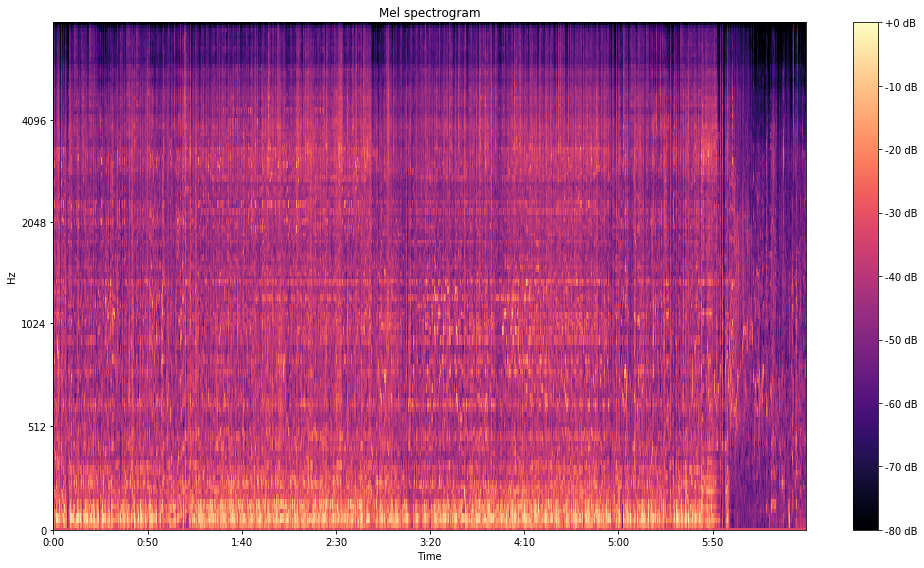

In [2]:
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
plt.figure(figsize=(14, 8))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                             y_axis='mel', fmax=8000,
                             x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [9]:
sr

22050

In [8]:
inputx = (spectrogram[:,:2*sr]).copy()
inputx.shape

(128, 17201)

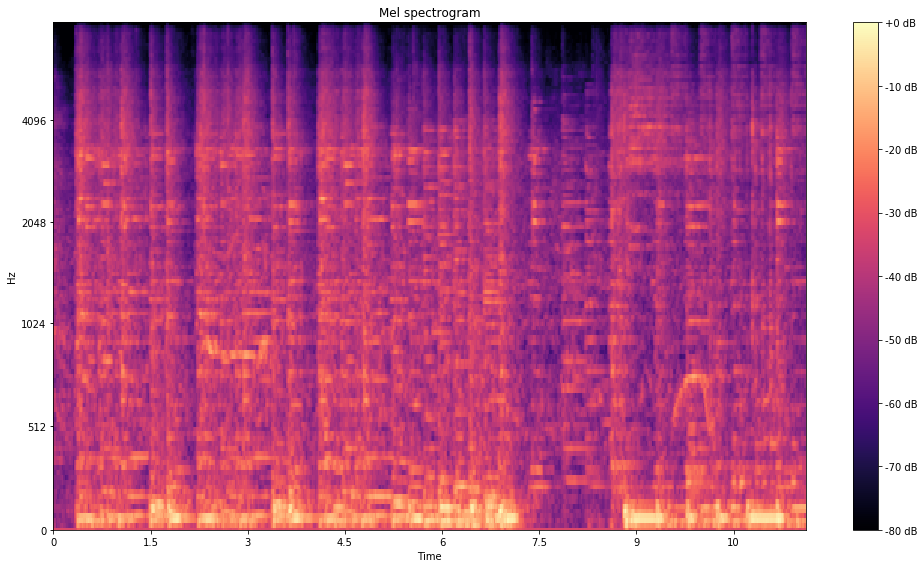

In [30]:
plt.figure(figsize=(14, 8))
librosa.display.specshow(librosa.power_to_db(spectrogram[:,:500], ref=np.max),
                             y_axis='mel', fmax=8000,
                             x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [32]:
y.shape

(8806770,)

In [19]:
spectrogram.shape

(128, 17201)

In [11]:
y.shape

(8806770,)

In [36]:
song_length = y.shape[0]/sr
print('Duration of song:', song_length)
print('Duration of song:', librosa.get_duration(y=y, sr=sr))

Duration of song: 399.4
Duration of song: 399.4


In [37]:
spec_per_sec= spectrogram.shape[1]/librosa.get_duration(y=y,sr=sr)
print('Number of Spectrogram columns per sec:', spec_per_sec)

Number of Spectrogram columns per sec: 43.067100650976464


In [57]:
dir1 = 'salami-data-public/annotations/1000/parsed/textfile1_functions.txt'
dir2 = 'salami-data-public/annotations/1000/parsed/textfile2_functions.txt'
anno1 = []
anno2 = []
with open(dir1) as file:
    for idx,line in enumerate(file):
        anno1.append(line.replace('\n','').split('\t'))

with open(dir2) as file:
    for idx,line in enumerate(file):
        anno2.append(line.replace('\n','').split('\t'))


In [65]:
anno1

[['0.0', 'Silence'],
 ['0.049342403', 'Intro'],
 ['8.848639455', 'no_function'],
 ['23.935464852', 'Verse'],
 ['35.661428571', 'no_function'],
 ['50.780544217', 'Verse'],
 ['62.76462585', 'no_function'],
 ['76.574353741', 'Solo'],
 ['172.408163265', 'Solo'],
 ['300.81494331', 'no_function'],
 ['317.868458049', 'Verse'],
 ['329.737800453', 'no_function'],
 ['359.325895691', 'no_function'],
 ['399.518072562', 'End']]